#### Controle de diretórios

In [1]:
import sys
sys.path.append('../')

import pandas as pd
from utils.plots import plot_curves, plot_multicurves
from utils.enums import Datas, ModelTypes, Sets, teste_size, main_data
from utils.checkpoints import loadCheckPointData
from metrics_classification import evaluate_classification

#### Variáveis

In [2]:
path_reports = f"../report_results/{Datas.HAR.value}/{main_data.value}_{teste_size}/"

## Análises da tarefa de pretexto

##### Carrega backbone com melhor acurácia (Datas.type)

In [3]:
ck = loadCheckPointData(path="../best_models/", file_name=f"backbone_{main_data.value}", device="cpu")
print("Best Acuracy: ", ck['accuracy'])

Best Acuracy:  53.267744202389316


##### Erro de treinamento x Validação

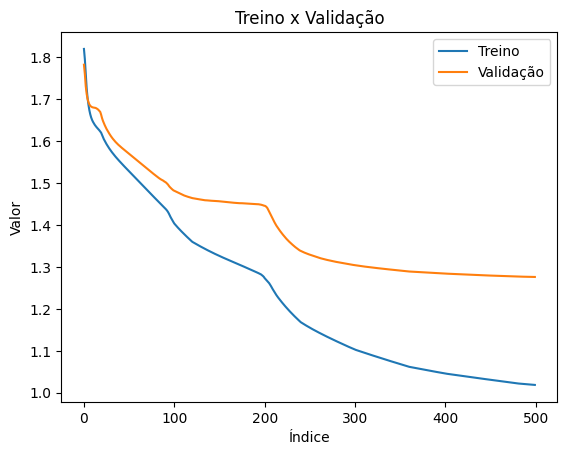

In [4]:
# df = pd.read_csv(f"{path_reports}errors_{ModelTypes.PRETEXT.value}.dat", sep=" ")
# plot_curves(
#     data1=df[Sets.TRAIN.value], 
#     data2=df[Sets.VALIDATION.value], 
#     data1_legend="Treino", 
#     data2_legend="Validação", 
#     title="Treino x Validação"
# )

#### Exibe metricas de avaliação

In [5]:
df = pd.read_csv(f"{path_reports}predictions_{ModelTypes.PRETEXT.value}.dat", sep=" ")
metrics = evaluate_classification(
    y_pred= df[Sets.PREDICTION.value],
    y_true= df[Sets.REAL.value]
)

for key, item in metrics.items():
    if not key == "Matriz de Confusão":
        print(f"{key}: {item}")
    else:
        print(f"{key}:\n{item}")

Acurácia: 0.4583333333333333
Precisão: 0.30277777777777776
Revocação: 0.4583333333333333
Pontuação F1: 0.34332358674463936
AUC-ROC: None
Matriz de Confusão:
[[4 0 0 0 0 0]
 [0 0 0 0 0 4]
 [1 0 3 0 0 0]
 [0 0 1 0 0 3]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]]


### Análises da tarefa de downstream

##### Carrega modelo com melhor acurácia

In [6]:
ck = loadCheckPointData(path="../best_models/", file_name=f"model_{main_data.value}_{ModelTypes.DOWNSTREAM.value}", device="cpu")
print("Best Acuracy: ", ck['accuracy'])

Best Acuracy:  66.66666666666667


##### Erro de treinamento x Validação

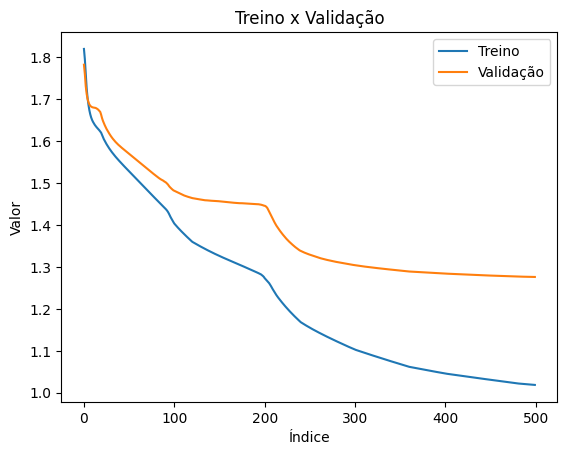

In [7]:
# df = pd.read_csv(f"{path_reports}errors_{ModelTypes.DOWNSTREAM.value}.dat", sep=" ")
# plot_curves(
#     data1=df[Sets.TRAIN.value], 
#     data2=df[Sets.VALIDATION.value], 
#     data1_legend="Treino", 
#     data2_legend="Validação", 
#     title="Treino x Validação"
# )

#### Exibe metricas de avaliação

In [9]:
df = pd.read_csv(f"{path_reports}predictions_{ModelTypes.DOWNSTREAM.value}.dat", sep=" ")
metrics = evaluate_classification(
    y_pred= df[Sets.PREDICTION.value],
    y_true= df[Sets.REAL.value]
)

for key, item in metrics.items():
    if not key == "confusion_mat":
        print(f"{key}: {item}")
    else:
        print(f"{key}:\n{item}")

Acurácia: 0.4583333333333333
Precisão: 0.30277777777777776
Revocação: 0.4583333333333333
Pontuação F1: 0.34332358674463936
AUC-ROC: None
Matriz de Confusão: [[4 0 0 0 0 0]
 [0 0 0 0 0 4]
 [1 0 3 0 0 0]
 [0 0 1 0 0 3]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]]


### Desenvolvimento das métricas

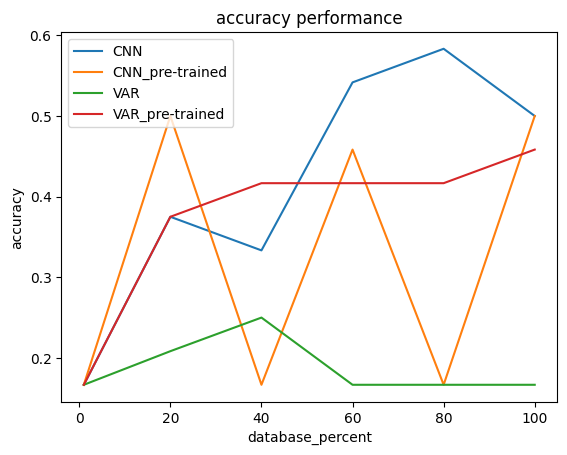

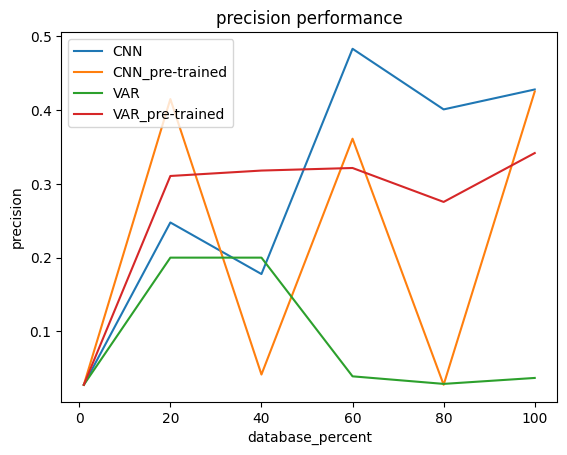

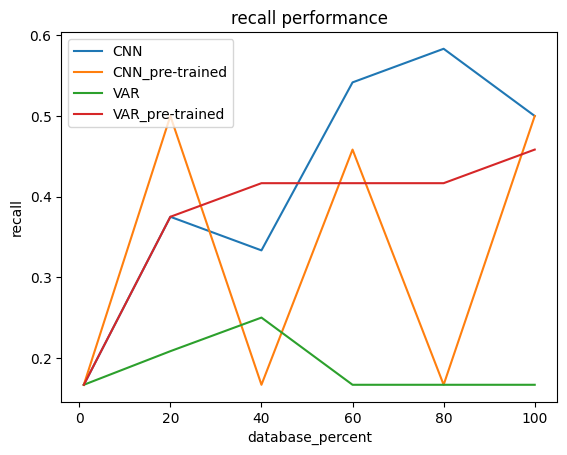

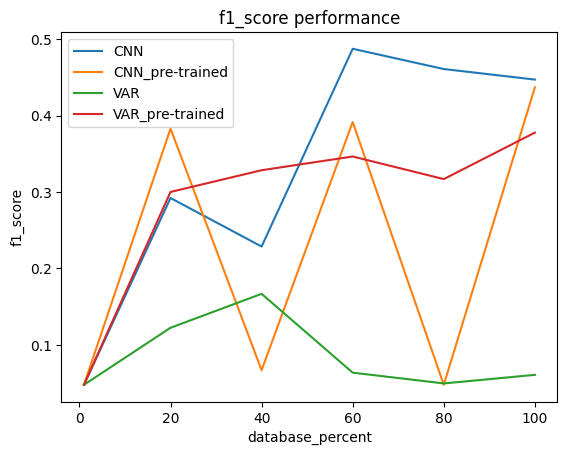

In [2]:
percents = [1, 20, 40, 60, 80, 100]

main_path = "har/percent"
path_cnn = f"{main_path}/cnn"
path_var = f"{main_path}/vae"

results_cnn_bk = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
results_cnn = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
results_var_bk = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
results_var = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

for percent in percents:
    cnn_bk = pd.read_csv(f"{path_cnn}/predictions_{percent}_m1.dat", sep=" ")
    cnn = pd.read_csv(f"{path_cnn}/predictions_{percent}_m2.dat", sep=" ")

    var_bk = pd.read_csv(f"{path_var}/predictions_{percent}_m1.dat", sep=" ")
    var = pd.read_csv(f"{path_var}/predictions_{percent}_m2.dat", sep=" ")

    metrics_cnn_bk = evaluate_classification(
        y_pred= cnn_bk[Sets.PREDICTION.value],
        y_true= cnn_bk[Sets.REAL.value]
    )
    metrics_cnn = evaluate_classification(
        y_pred= cnn[Sets.PREDICTION.value],
        y_true= cnn[Sets.REAL.value]
    )
    metrics_var_bk = evaluate_classification(
        y_pred= var_bk[Sets.PREDICTION.value],
        y_true= var_bk[Sets.REAL.value]
    )
    metrics_var = evaluate_classification(
        y_pred= var[Sets.PREDICTION.value],
        y_true= var[Sets.REAL.value]
    )

    for key in results_cnn.keys():
        results_cnn[key].append(metrics_cnn[key])   
        results_var[key].append(metrics_var[key])
        results_cnn_bk[key].append(metrics_cnn_bk[key])
        results_var_bk[key].append(metrics_var_bk[key])

for key in results_cnn.keys():
    plot_multicurves(
        title=f"{key} performance",
        x_label="database_percent",
        y_label=key,
        x=percents,
        path=f"{main_path}/plots",
        datas=[results_cnn[key], results_cnn_bk[key], results_var[key], results_var_bk[key]],
        legends=["CNN", "CNN_pre-trained", "VAE", "VAE_pre-trained"]
    )

# print(results_cnn["accuracy"])

#### Plota os mesmos graficos acima para somente uma curva desejada

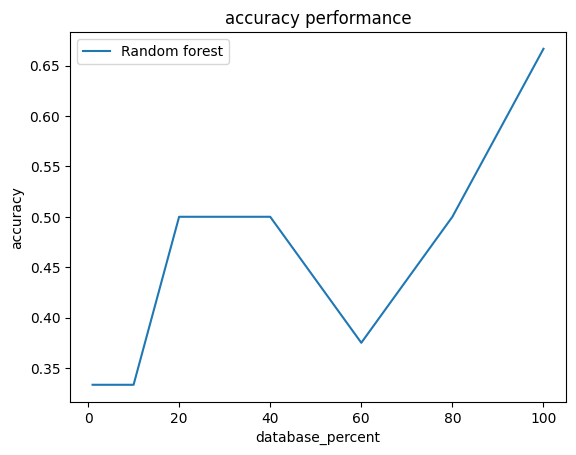

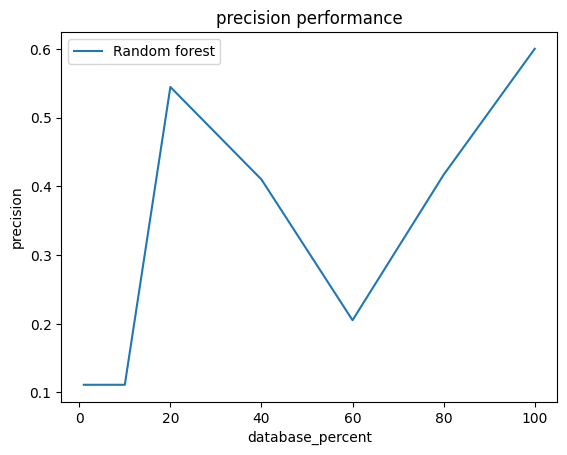

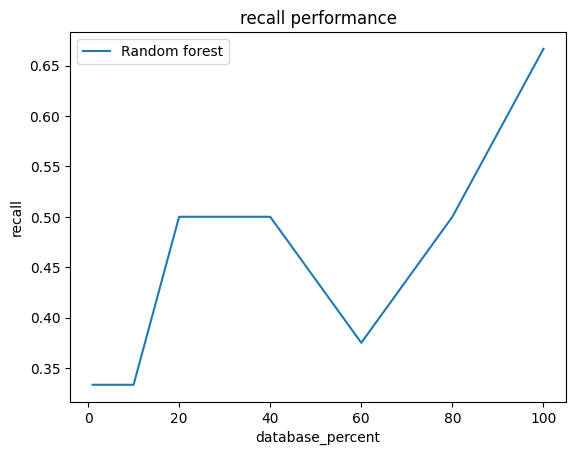

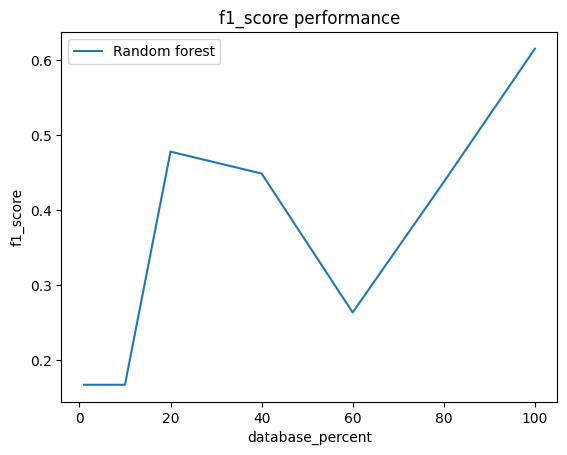

In [8]:
percents = [1, 10, 20, 40, 60, 80, 100]

main_path = "har/percent"
path_model = f"{main_path}/rf"

results_model = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}

for percent in percents:
    model = pd.read_csv(f"{path_model}/predictions_{percent}_m2.dat", sep=" ")
    metrics_model = evaluate_classification(
        y_pred= model[Sets.PREDICTION.value],
        y_true= model[Sets.REAL.value]
    )

    for key in results_model.keys():
        results_model[key].append(metrics_model[key])   

for key in results_model.keys():
    plot_multicurves(
        title=f"{key} performance",
        x_label="database_percent",
        y_label=key,
        x=percents,
        path=f"{main_path}/plots",
        datas=[results_model[key]],
        legends=["Random forest"]
    )

# print(results_model["accuracy"])